In [2]:
import numpy as np
np.random.seed(0)
import time
from matplotlib import pyplot as plt

In [3]:
data = np.loadtxt("train",encoding='cp1252')

In [4]:
print(data.shape)

(800, 1001)


In [5]:
X = np.array(data[0:800,0:data.shape[1]-1])
print(X.shape)

(800, 1000)


In [6]:
Y = np.array(data[0:800,data.shape[1]-1])
print(Y.shape)

(800,)


In [7]:
Y = Y.reshape(-1,1)
print(Y.shape)

(800, 1)


In [8]:
#Square loss function f(w) = ||Xw-y||^2
#gradient of loss = 2*X^T(Xw-y)
#func_value = 'f' and #grad_value = 'g'
def loss_function(X,w,Y,i):
    #indicator to indicate if we want the function or its gradient 
    loss = X@w-Y
    if i =='f':
        sq_loss = loss.T@loss
        return sq_loss
    if i=='g':
        grad = X.T@loss
        return 2*grad


In [9]:
#objective function g(w) = loss function + L1norm(w)
def objective_function(X,w,Y):
    fun = np.sum(np.abs(w)) + loss_function(X,w,Y,'f').item()
    return fun

In [10]:
#subgradient of L1 norm
def subgradL1(w):
    subgrad = np.zeros([1000,1])
    for i in range(1000):
        if w[i,0]<0:
            subgrad[i,0] = -1
        elif w[i,0] == 0:
            subgrad[i,0] = -1;
        else:
            subgrad[i,0] = 1;
            
    return subgrad

In [11]:
#Primal Subgradient Descent update
def PSD(w_prev,t,learningRate,X,Y):
    l_rate = learningRate/np.sqrt(t+1)
    subgradient = subgradL1(w_prev) + loss_function(X,w_prev,Y,'g')
    w_new = w_prev - l_rate*subgradient
    return w_new
       

In [12]:
#select top 20
def top20(w):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-12-7bec9f35331d>, line 3)

In [13]:
def optimization(X,y,learningRate,iterations,w_initial):
    
    w_prev = w_initial
    w_new = w_initial 
    objval = []
    timeSeries = []
    totaltime = 0
    
    for itr in range(iterations):
        
        tic = time.perf_counter()
        
        w_new = PSD(w_prev,itr,learningRate,X,Y)
        
        w_prev = w_new
        
        toc = time.perf_counter()
        
        totaltime = totaltime + (toc-tic)
        
        curr_objvalue = objective_function(X,w_new,Y)
        
        objval.append(curr_objvalue.flatten())
        
        timeSeries.append(totaltime)
        
    return(w_new,objval,timeSeries)    
        

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in matmul
  


[inf]
0.8269489069996894


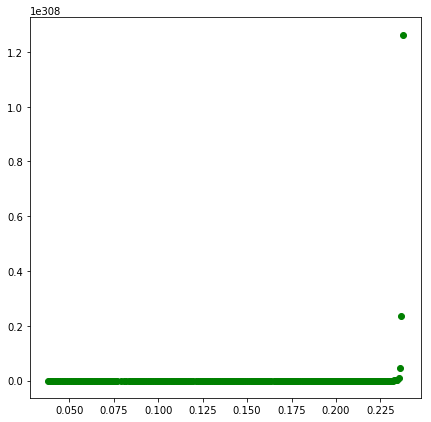

In [19]:
iterations = 1000
w_initial = np.random.rand(1000,1)
learningRate = 0.1

(w_final,objval, timeSeries)= optimization(X,Y,learningRate,iterations,w_initial)

iters = [i for i in range(1000)]
#for i in range(1000):
#    print(objval[i])
print(objval[-1])
print(timeSeries[-1])
plt.figure(figsize=(7,7))
plt.plot(timeSeries[20:], objval[20:], 'go');